In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install bs4

  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software while executing command python setup.py egg_info
ERROR: Could not install packages due to an OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software



In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install bs4

  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software while executing command python setup.py egg_info
ERROR: Could not install packages due to an OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software



In [6]:
import pandas as pd
import yfinance as yf
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
tesla = yf.Ticker("TSLA")

In [8]:
tesla_data = tesla.history(period="max")

In [9]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [10]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

In [11]:
html_data = requests.get(url).text

In [16]:
soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')

[<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>]

In [17]:
import pandas as pd

tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)


C:\Users\ziyan\AppData\Local\Temp\ipykernel_7620\466840612.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
C:\Users\ziyan\AppData\Local\Temp\ipykernel_7620\466840612.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
C:\Users\ziyan\AppData\Local\Temp\ipykernel_7620\466840612.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
C:\Users\ziyan\AppData\Local\Temp\ipykernel_7620\466840612.py:10: FutureWarning: The frame.append method is deprecated an

In [18]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [19]:
tesla_revenue.tail()

,Date,Revenue
49,2010-09-30,31
50,2010-06-30,28
51,2010-03-31,21
53,2009-09-30,46
54,2009-06-30,27


In [20]:
gamestop = yf.Ticker("GME")

In [21]:
gamestop_data = gamestop.history(period="max")

In [22]:
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [23]:
url1 = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

In [24]:
html_data = requests.get(url1).text

In [25]:
soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')

[<title>GameStop Revenue 2010-2023 | GME | MacroTrends</title>]

In [26]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):

    if ('GameStop Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

C:\Users\ziyan\AppData\Local\Temp\ipykernel_7620\326897550.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
C:\Users\ziyan\AppData\Local\Temp\ipykernel_7620\326897550.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
C:\Users\ziyan\AppData\Local\Temp\ipykernel_7620\326897550.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
C:\Users\ziyan\AppData\Local\Temp\ipykernel_7620\326897550.py:15: FutureWarning: The frame.append method is deprecated and will be removed 

In [27]:
gme_revenue.tail()

,Date,Revenue
52,2010-01-31,3524
53,2009-10-31,1835
54,2009-07-31,1739
55,2009-04-30,1981
56,2009-01-31,3492


In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [29]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

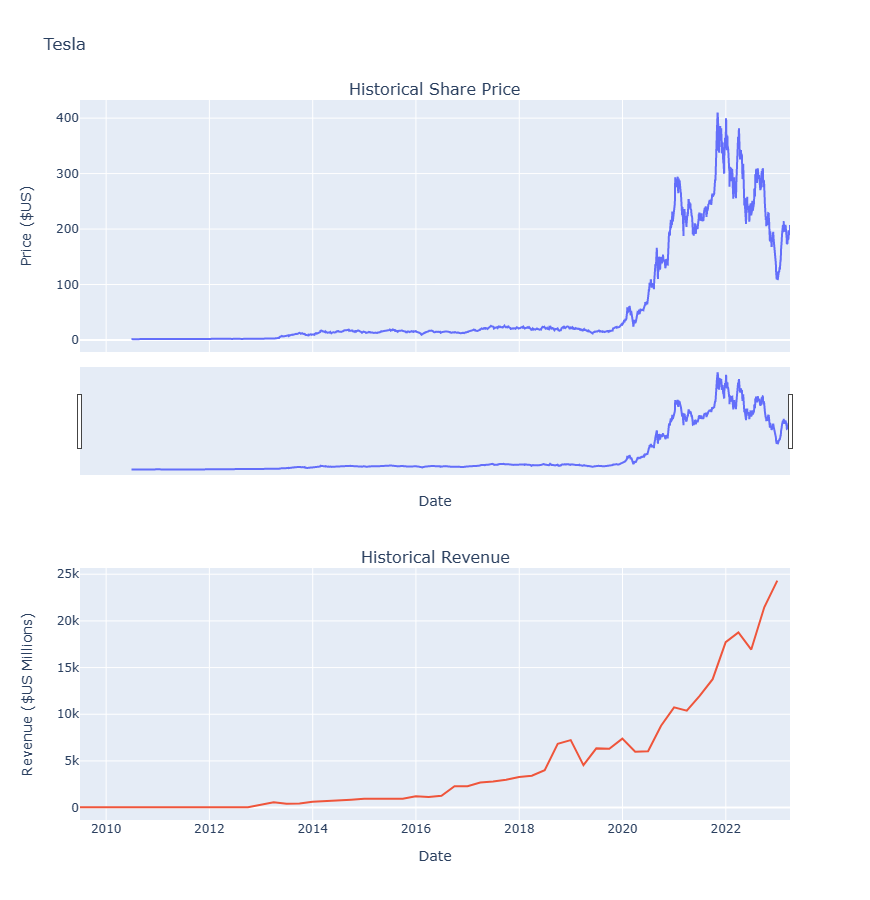

In [31]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

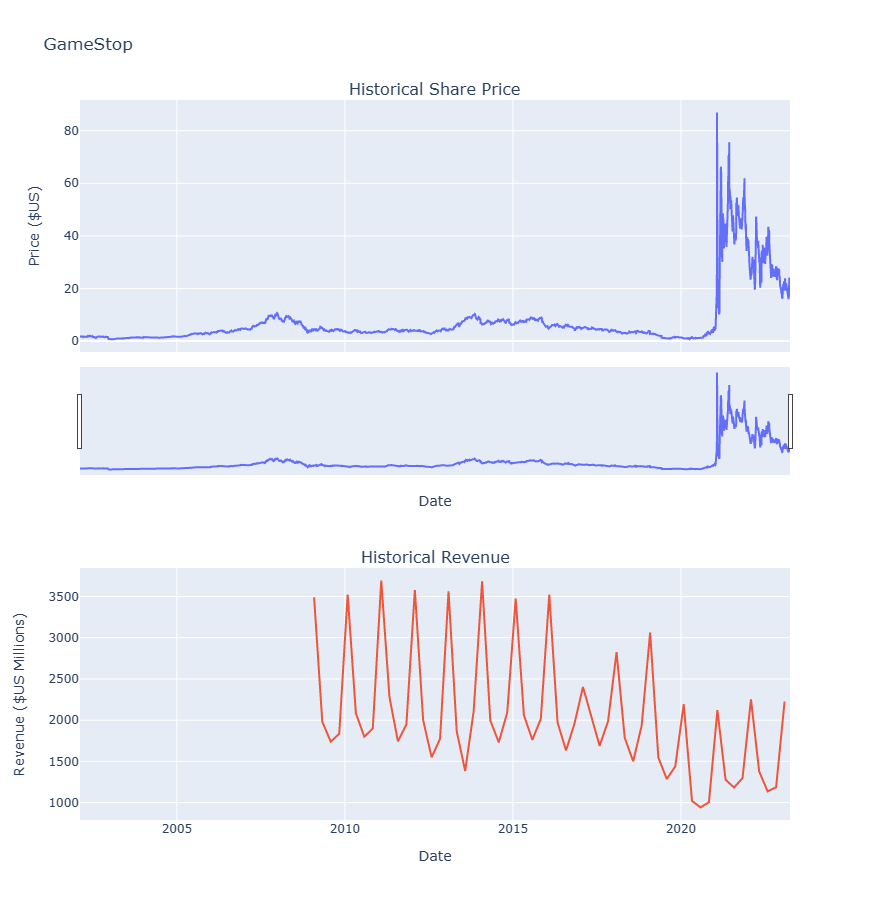

In [32]:
make_graph(gamestop_data, gme_revenue, 'GameStop')